# Sentiment Analysis using kaggle datasets

https://www.kaggle.com/rahulin05/sentiment-labelled-sentences-data-set

we are using 3 datasets today:
- amazon_cells_labelled.txt
- imdb_labelled.txt
- yelp_labelled.txt

lets explore the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
with open("data/amazon_cells_labelled.txt", "rb") as f:
    for line in f:
        print(line)

b'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n'
b'Good case, Excellent value.\t1\n'
b'Great for the jawbone.\t1\n'
b'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n'
b'The mic is great.\t1\n'
b'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n'
b'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n'
b'If you are Razr owner...you must have this!\t1\n'
b'Needless to say, I wasted my money.\t0\n'
b'What a waste of money and time!.\t0\n'
b'And the sound quality is great.\t1\n'
b'He was very impressed when going from the original battery to the extended battery.\t1\n'
b'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\n'
b'Very good quality though\t1\n'
b'The design is very odd, as the ear "clip" is not very comfortable at all.\t0\n'
b'Highly recommend

In [3]:
amazon = pd.read_csv("data/amazon_cells_labelled.txt", sep="\t", header=None)
amazon.columns = ["message", "reviews"]
amazon.head()

,message,reviews
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
amazon.groupby("reviews").count()

,message
reviews,
0,500
1,500


In [5]:
amazon["length"] = amazon["message"].apply(len)
amazon.head()

,message,reviews,length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


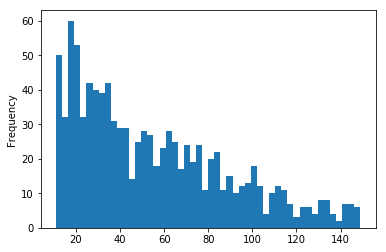

In [6]:
amazon["length"].plot.hist(bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E0D298E80>,
      dtype=object)

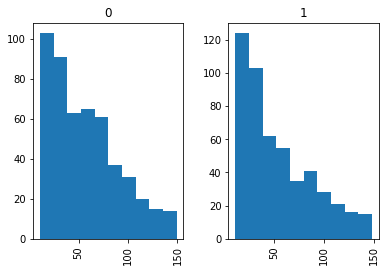

In [7]:
amazon.hist(column="length", by="reviews")

# Tokenizing

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adam.ilyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
positive = amazon[amazon["reviews"] == 1]
negative = amazon[amazon["reviews"] == 0]

In [11]:
#example

print(positive.iloc[0]["message"])
tokens = (nltk.tokenize.word_tokenize(positive["message"].iloc[0]))
print(tokens)

Good case, Excellent value.
['Good', 'case', ',', 'Excellent', 'value', '.']


In [12]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adam.ilyas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing

In [14]:
from nltk.corpus import stopwords
from string import punctuation

In [20]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    return tokens

### create a word-to-index map so that we can create our word-frequency vectors later

In [21]:
word_index_map = {}
current_index = 0

In [22]:
postive_tokenized = [my_tokenizer(i) for i in positive["message"]]
negative_tokenized = [my_tokenizer(i) for i in negative["message"]]

TypeError: argument of type 'LazyCorpusLoader' is not iterable

In [78]:
positive_tokenized

[]

Good case, Excellent value.


In [31]:
combined_messages =positive + negative

for i in range(len(positive.index)):
    message = positive.iloc[i]["message"]
    tokens = my_tokenizer(message)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[i] = token

TypeError: argument of type 'LazyCorpusLoader' is not iterable

In [ ]:
for i in range(len(positive.index)):
    message = positive.iloc[i]["message"]
    tokens = my_tokenizer(message)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[i] = token